<a href="https://colab.research.google.com/github/rasel3413/Algorithm/blob/main/Final_4thYearProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, average_precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Load the data
df = pd.read_csv("/content/drive/MyDrive/4-2/MyThesis/merry555-FibVID-14b95c3/claim_propagation/dataset_depth_level.csv")
size= df.shape[0]
print("size of the dataset=",size)
print("\n\n")
print(df.info())


size of the dataset= 3179



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_user                3179 non-null   int64  
 1   like_count                3179 non-null   int64  
 2   depth                     3179 non-null   int64  
 3   parent_user               3179 non-null   int64  
 4   retweet_count             3179 non-null   int64  
 5   claim_number_x            3179 non-null   int64  
 6   group_x                   3179 non-null   int64  
 7   shared_status             3179 non-null   object 
 8   following_count           3179 non-null   int64  
 9   follower_count            3179 non-null   int64  
 10  user_topic0               3179 non-null   float64
 11  user_topic1               3179 non-null   float64
 12  user_topic2               3179 non-null   float64
 13  user_topic3               3179 non

In [ ]:
print(df.head())

   tweet_user  like_count  depth  parent_user  retweet_count  claim_number_x  \
0       73080           0      2          540              0             298   
1        9960           1      2          540              0             298   
2       77050           0      2          540              0             298   
3      132658        4036      0            0           1113             298   
4       69662           0      2          540              0             298   

   group_x shared_status  following_count  follower_count  ...  user_topic6  \
0        1    not shared             6721         1918802  ...     0.045455   
1        1    not shared             6721         1918802  ...     0.045455   
2        1    not shared             6721         1918802  ...     0.045455   
3        1        shared              101              56  ...     0.127907   
4        1    not shared             6721         1918802  ...     0.045455   

   user_topic7  user_topic8  user_topic9    

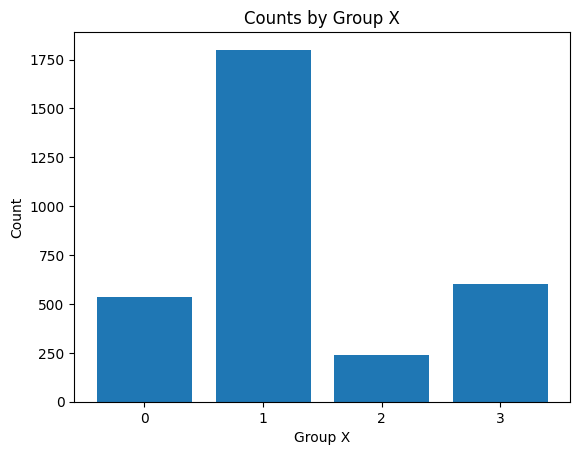

In [ ]:
#distribution of fake real news
counts = df['group_x'].value_counts().sort_index()

# Plotting the grouped bar chart
plt.bar(counts.index, counts.values)

# Adding labels, title, and legend
plt.xlabel('Group X')
plt.ylabel('Count')
plt.title('Counts by Group X')
plt.xticks(counts.index)

# Show plot
plt.show()

In [6]:
#splitting the dataset and doing other necessary things before classifier
label_encoder = LabelEncoder()
df['body_stylistic_features'] = label_encoder.fit_transform(df['body_stylistic_features'])
df['body_psychology_features'] = label_encoder.fit_transform(df['body_psychology_features'])
df['body_complexity_features'] = label_encoder.fit_transform(df['body_complexity_features'])

# Define function to map shared status
def map_shared_status(status):
    return 1 if status == "shared" else 0

# Prepare data
X = df[['like_count','group_x', 'max_depth','parent_user','tweet_user', 'retweet_count', 'following_count','TFF', 'follower_count','body_stylistic_features','body_psychology_features','body_complexity_features']]
y = df['shared_status'].apply(map_shared_status)
# df=df.dropna(inplace=True)
# imputer = SimpleImputer(strategy='most_frequent')
# imputer.fit(df)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Filter testing set to include only samples with 'group' class value 0
X_test_group0 = X_test[(X_test['group_x'] == 1) | (X_test['group_x'] == 3)]
y_test_group0 = y_test[(X_test['group_x'] == 1) | (X_test['group_x'] == 3)]


print("Filtered X_test shape:", X_test.shape)
print("Filtered y_test shape:", y_test.shape)
print("Filtered X_test shape:", X_test_group0.shape)
print("Filtered y_test shape:", y_test_group0.shape)

Filtered X_test shape: (954, 12)
Filtered y_test shape: (954,)
Filtered X_test shape: (717, 12)
Filtered y_test shape: (717,)


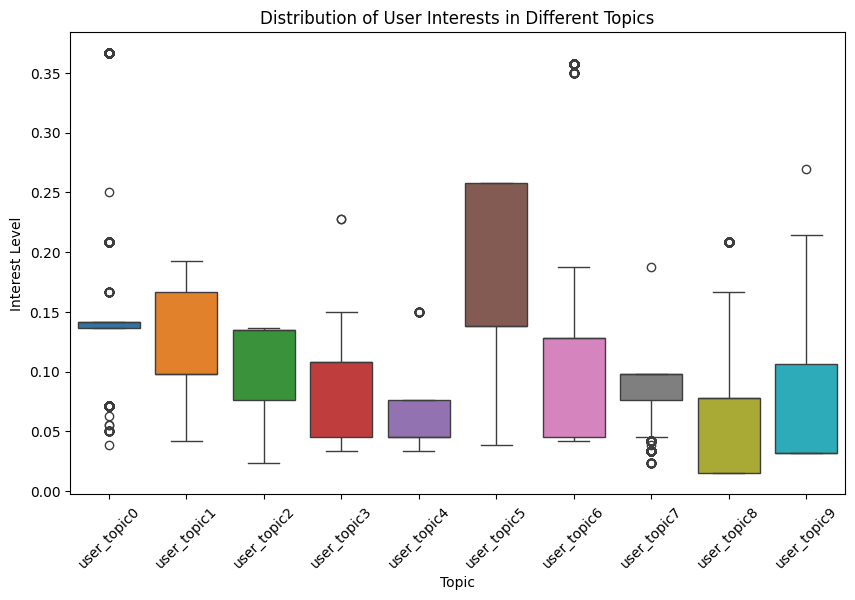

In [ ]:
import seaborn as sns

# Select user topic columns
user_topics = df[['user_topic0', 'user_topic1', 'user_topic2', 'user_topic3', 'user_topic4', 'user_topic5', 'user_topic6', 'user_topic7', 'user_topic8', 'user_topic9']]

# Plot the distribution of user interests in different topics
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_topics)
plt.xlabel('Topic')
plt.ylabel('Interest Level')
plt.title('Distribution of User Interests in Different Topics')
plt.xticks(rotation=45)
plt.show()

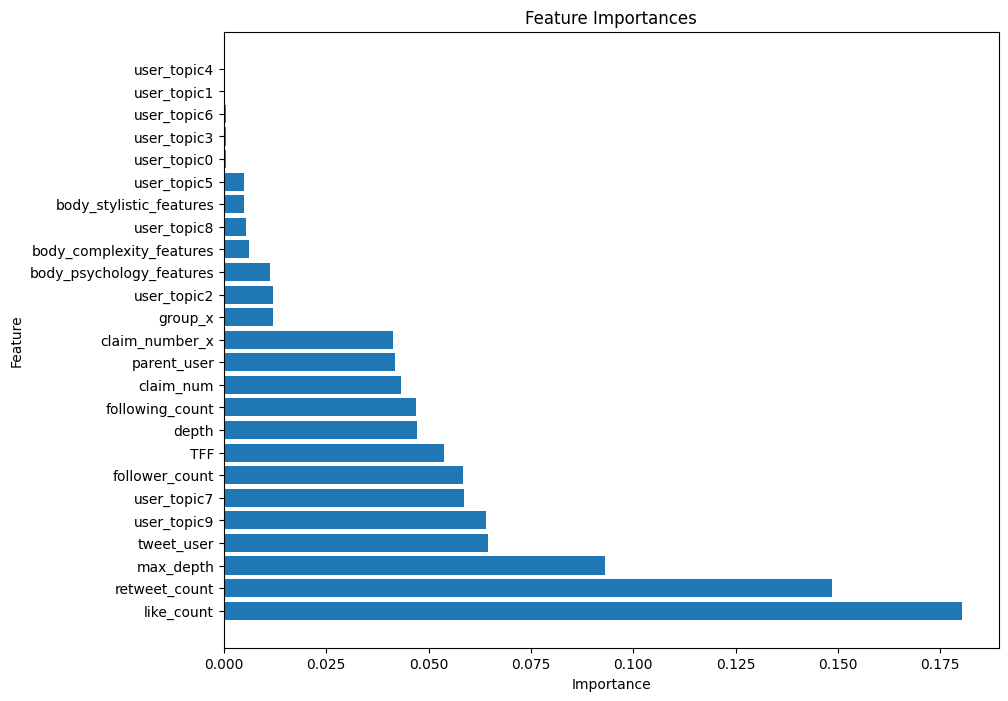

Accuracy on test set: 0.9182389937106918


In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create DataFrame to store feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Evaluate classifier on test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

Classifier: Random Forest
Mean AUROC: 0.8959553851915768
Mean Accuracy: 0.8609404248997178
Mean Precision: 0.8114870605923418
Mean Recall: 0.9370541626450585
Mean F1 Score: 0.8677842773406411


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       380
           1       0.87      0.98      0.92       337

    accuracy                           0.92       717
   macro avg       0.92      0.92      0.92       717
weighted avg       0.93      0.92      0.92       717



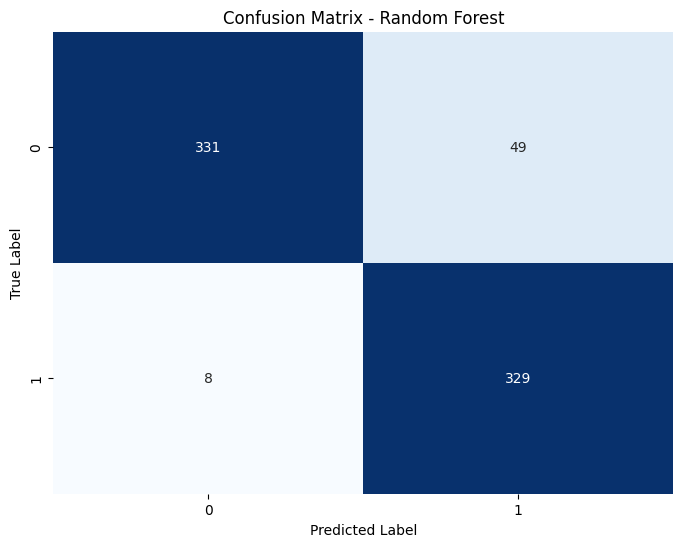

Evaluation on filtered test set (group=0):
Accuracy: 0.9205020920502092
Precision: 0.8703703703703703
Recall: 0.9762611275964391
AUROC: 0.9236568795876933
PR AUC: 0.8608663603200682
F1 Score: 0.9202797202797203


Classifier: XGBoost
Mean AUROC: 0.9072177491726766
Mean Accuracy: 0.8530792849007082
Mean Precision: 0.8146050326383605
Mean Recall: 0.9089088909339857
Mean F1 Score: 0.8557659246188878


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.90       380
           1       0.87      0.93      0.90       337

    accuracy                           0.90       717
   macro avg       0.90      0.90      0.90       717
weighted avg       0.90      0.90      0.90       717



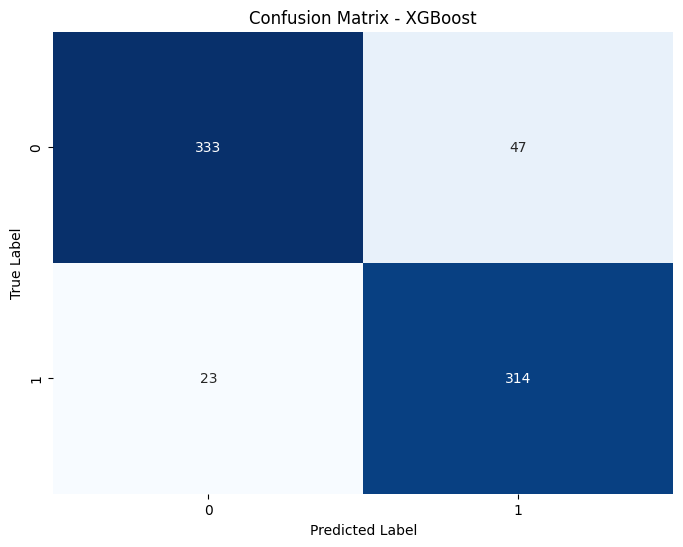

Evaluation on filtered test set (group=0):
Accuracy: 0.902370990237099
Precision: 0.8698060941828255
Recall: 0.9317507418397626
AUROC: 0.9040332656567234
PR AUC: 0.8425205767194044
F1 Score: 0.8997134670487105


Classifier: HistGradientBoostingClassifier
Mean AUROC: 0.9039178220410584
Mean Accuracy: 0.8555994651611945
Mean Precision: 0.8148912868488104
Mean Recall: 0.9156180557114318
Mean F1 Score: 0.8588093898730801


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       380
           1       0.88      0.95      0.91       337

    accuracy                           0.91       717
   macro avg       0.91      0.92      0.91       717
weighted avg       0.92      0.91      0.91       717



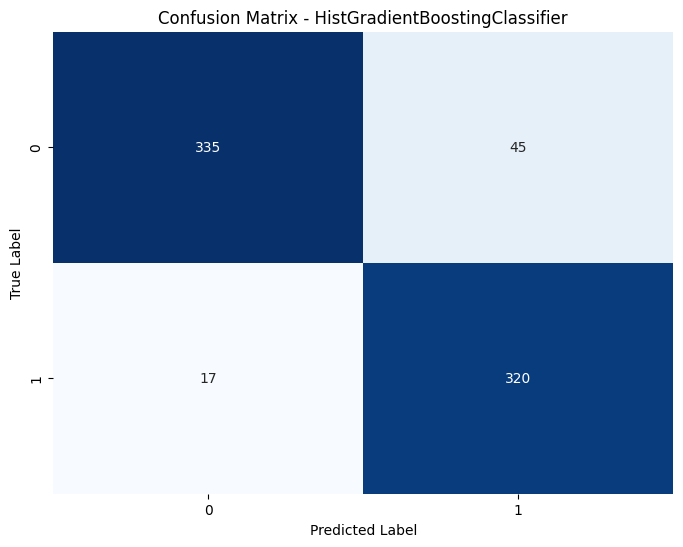

Evaluation on filtered test set (group=0):
Accuracy: 0.9135285913528591
Precision: 0.8767123287671232
Recall: 0.9495548961424333
AUROC: 0.9155669217554271
PR AUC: 0.8561963866602468
F1 Score: 0.9116809116809117


Classifier: Logistic Regression
Mean AUROC: 0.8695234485808747
Mean Accuracy: 0.8539781112266626
Mean Precision: 0.8122700647196096
Mean Recall: 0.951781104801239
Mean F1 Score: 0.868365492405923


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       380
           1       0.80      0.96      0.87       337

    accuracy                           0.87       717
   macro avg       0.88      0.87      0.87       717
weighted avg       0.88      0.87      0.87       717



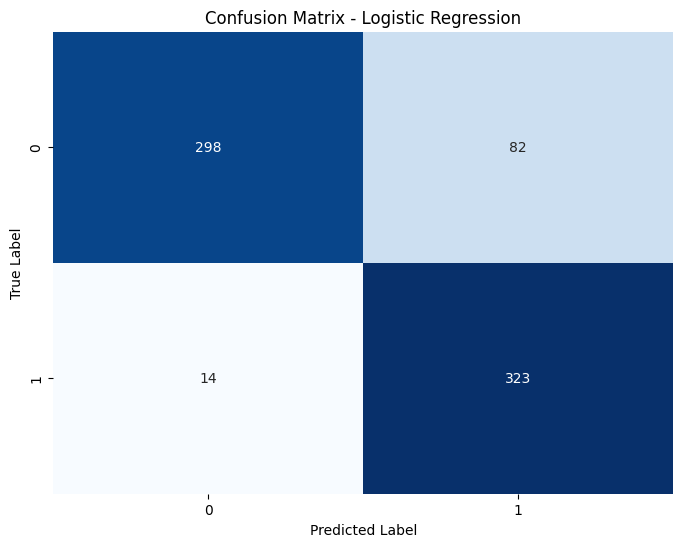

Evaluation on filtered test set (group=0):
Accuracy: 0.8661087866108786
Precision: 0.7975308641975308
Recall: 0.9584569732937686
AUROC: 0.8713337498047791
PR AUC: 0.7839248201597091
F1 Score: 0.8706199460916442


Classifier: Support Vector Machine
Mean AUROC: 0.8841224162274781
Mean Accuracy: 0.7835116129351756
Mean Precision: 0.7304778234980512
Mean Recall: 0.9691881214787547
Mean F1 Score: 0.821730162118761


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       380
           1       0.76      0.98      0.85       337

    accuracy                           0.84       717
   macro avg       0.86      0.85      0.84       717
weighted avg       0.87      0.84      0.84       717



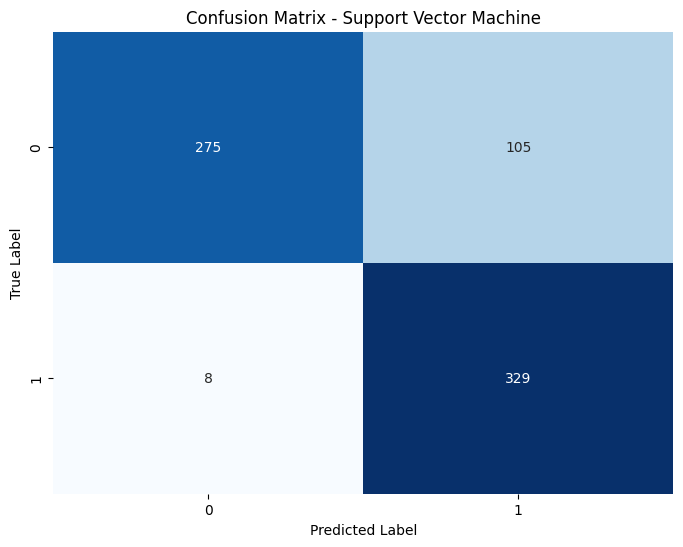

Evaluation on filtered test set (group=0):
Accuracy: 0.8423988842398884
Precision: 0.7580645161290323
Recall: 0.9762611275964391
AUROC: 0.8499726690613775
PR AUC: 0.7512265204227382
F1 Score: 0.853437094682231




In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("XGBoost", XGBClassifier()),
    ("HistGradientBoostingClassifier", HistGradientBoostingClassifier()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),  # Increase max_iter here

    ("Support Vector Machine", SVC())
]


# Loop through classifiers
for clf_name, clf in classifiers:
    print(f"Classifier: {clf_name}")

    # Perform cross-validation on training set
    cv_scores_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
    cv_scores_accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    cv_scores_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
    cv_scores_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
    cv_scores_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')  # Add F1 score

    print(f"Mean AUROC: {np.mean(cv_scores_auc)}")
    print(f"Mean Accuracy: {np.mean(cv_scores_accuracy)}")
    print(f"Mean Precision: {np.mean(cv_scores_precision)}")
    print(f"Mean Recall: {np.mean(cv_scores_recall)}")
    print(f"Mean F1 Score: {np.mean(cv_scores_f1)}")  # Print mean F1 score
    print("\n")

    # Fit classifier on full training set and evaluate on filtered test set
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test_group0)

    # Classification report
    report = classification_report(y_test_group0, y_pred)
    print("Classification Report:")
    print(report)

    # Confusion matrix
    cm = confusion_matrix(y_test_group0, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.show()

    accuracy = accuracy_score(y_test_group0, y_pred)
    precision = precision_score(y_test_group0, y_pred)
    recall = recall_score(y_test_group0, y_pred)
    roc_auc = roc_auc_score(y_test_group0, y_pred)
    pr_auc = average_precision_score(y_test_group0, y_pred)
    f1 = f1_score(y_test_group0, y_pred)  # Calculate F1 score

    print(f"Evaluation on filtered test set (group=0):")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"AUROC: {roc_auc}")
    print(f"PR AUC: {pr_auc}")
    print(f"F1 Score: {f1}")  # Print F1 score
    print("\n")


Classifier: Random Forest
Mean AUROC: 0.8930057389531401
Mean Accuracy: 0.8628262269103155
Mean Precision: 0.8140100883425208
Mean Recall: 0.9350519629189019
Mean F1 Score: 0.8638400527932022


Classification Report:
              precision    recall  f1-score   support

  Not Shared       0.98      0.87      0.92       380
      Shared       0.87      0.98      0.92       337

    accuracy                           0.92       717
   macro avg       0.92      0.92      0.92       717
weighted avg       0.93      0.92      0.92       717



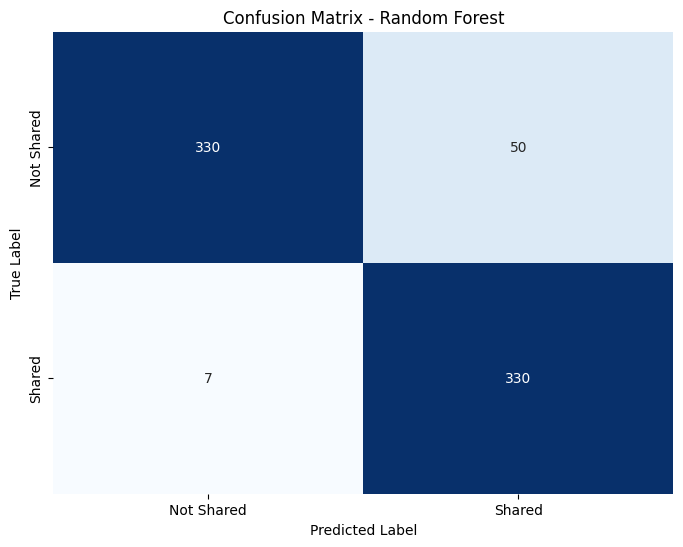

NameError: name 'roc_curve' is not defined

In [8]:
# Loop through classifiers
for clf_name, clf in classifiers:
    print(f"Classifier: {clf_name}")

    # Perform cross-validation on training set
    cv_scores_auc = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
    cv_scores_accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    cv_scores_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
    cv_scores_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
    cv_scores_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')  # Add F1 score

    print(f"Mean AUROC: {np.mean(cv_scores_auc)}")
    print(f"Mean Accuracy: {np.mean(cv_scores_accuracy)}")
    print(f"Mean Precision: {np.mean(cv_scores_precision)}")
    print(f"Mean Recall: {np.mean(cv_scores_recall)}")
    print(f"Mean F1 Score: {np.mean(cv_scores_f1)}")  # Print mean F1 score
    print("\n")

    # Fit classifier on full training set and evaluate on filtered test set
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test_group0)

    # Classification report
    report = classification_report(y_test_group0, y_pred, labels=[0, 1], target_names=['Not Shared', 'Shared'])
    print("Classification Report:")
    print(report)

    # Confusion matrix
    cm = confusion_matrix(y_test_group0, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_group0, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {clf_name}')
    plt.legend(loc='lower right')
    plt.show()

    # F1 score
    f1 = f1_score(y_test_group0, y_pred)
    print(f"F1 Score: {f1}")  # Print F1 score

    # Additional evaluation metrics
    accuracy = accuracy_score(y_test_group0, y_pred)
    precision = precision_score(y_test_group0, y_pred)
    recall = recall_score(y_test_group0, y_pred)
    roc_auc = roc_auc_score(y_test_group0, y_pred)
    pr_auc = average_precision_score(y_test_group0, y_pred)

    print(f"Evaluation on filtered test set (group=0):")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"AUROC: {roc_auc}")
    print(f"PR AUC: {pr_auc}")
    print("\n")


# **RandomForestClassifier()**




Mean AUROC: 0.9611911895700057
Mean Accuracy: 0.9024719101123596
Mean Precision: 0.8661064377244051
Mean Recall: 0.9462264150943396
Mean F1 Score: 0.9039927682940574


Classification Report:
              precision    recall  f1-score   support

  Not Shared       0.97      0.88      0.92       380
      Shared       0.88      0.97      0.92       337

    accuracy                           0.92       717
   macro avg       0.93      0.93      0.92       717
weighted avg       0.93      0.92      0.92       717



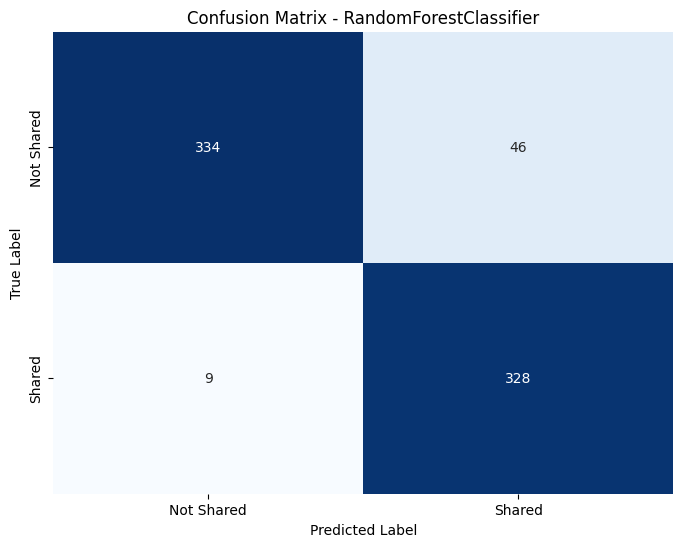

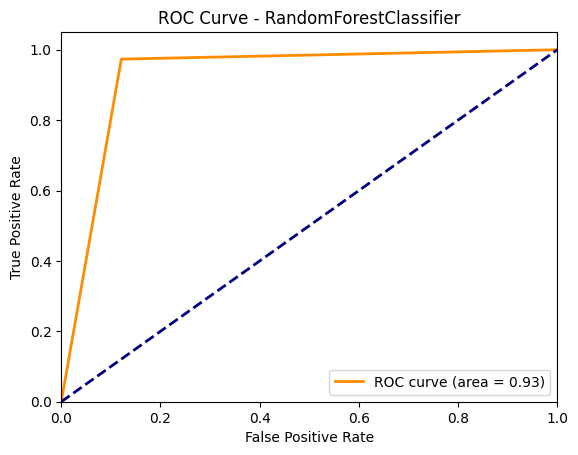

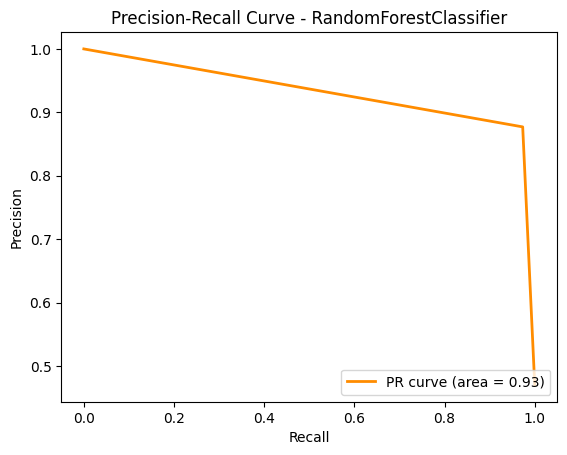

Evaluation on filtered fake news test set:
F1 Score: 0.9226441631504924
Accuracy: 0.9232914923291492
Precision: 0.8770053475935828
Recall: 0.973293768545994
AUROC: 0.9261205684835232
PR AUC: 0.8661361410495778




In [ ]:
clf=RandomForestClassifier()
clf_name="RandomForestClassifier"
cv_scores_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')  # Add F1 score

print(f"Mean AUROC: {np.mean(cv_scores_auc)}")
print(f"Mean Accuracy: {np.mean(cv_scores_accuracy)}")
print(f"Mean Precision: {np.mean(cv_scores_precision)}")
print(f"Mean Recall: {np.mean(cv_scores_recall)}")
print(f"Mean F1 Score: {np.mean(cv_scores_f1)}")  # Print mean F1 score
print("\n")

# Fit classifier on full training set and evaluate on filtered test set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_group0)

# Classification report
report = classification_report(y_test_group0, y_pred, labels=[0, 1], target_names=['Not Shared', 'Shared'])
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_test_group0, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {clf_name}')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_group0, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {clf_name}')
plt.legend(loc='lower right')
plt.show()


# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_group0, y_pred)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {clf_name}')
plt.legend(loc='lower right')
plt.show()

# F1 score
f1 = f1_score(y_test_group0, y_pred)


# Additional evaluation metrics
accuracy = accuracy_score(y_test_group0, y_pred)
precision = precision_score(y_test_group0, y_pred)
recall = recall_score(y_test_group0, y_pred)
roc_auc = roc_auc_score(y_test_group0, y_pred)
pr_auc = average_precision_score(y_test_group0, y_pred)

print(f"Evaluation on filtered fake news test set:")
print(f"F1 Score: {f1}")  # Print F1 score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUROC: {roc_auc}")
print(f"PR AUC: {pr_auc}")
print("\n")


# **Decision Tree Classifer**

Mean AUROC: 0.8788525386670984
Mean Accuracy: 0.8831460674157304
Mean Precision: 0.873318947220133
Mean Recall: 0.868867924528302
Mean F1 Score: 0.8787171911484354


Classification Report:
              precision    recall  f1-score   support

  Not Shared       0.91      0.90      0.90       380
      Shared       0.89      0.90      0.89       337

    accuracy                           0.90       717
   macro avg       0.90      0.90      0.90       717
weighted avg       0.90      0.90      0.90       717



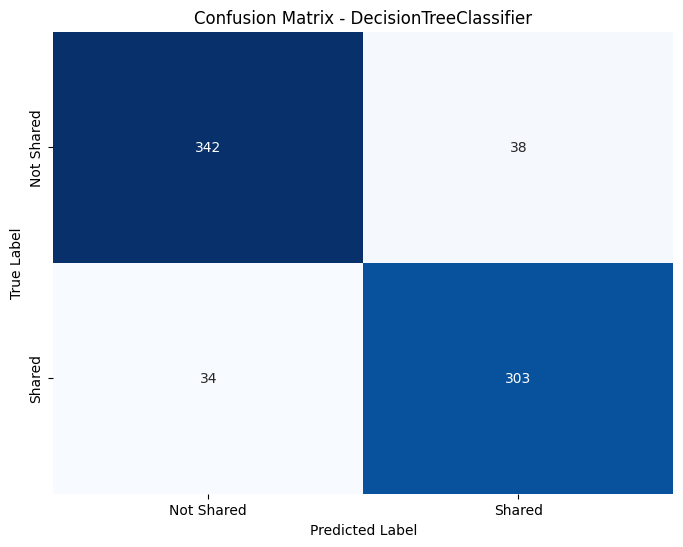

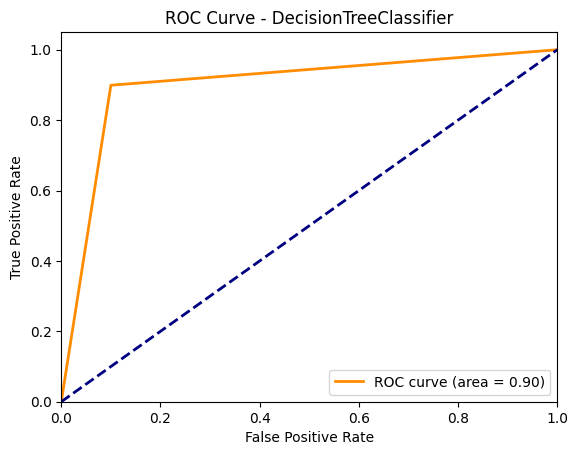

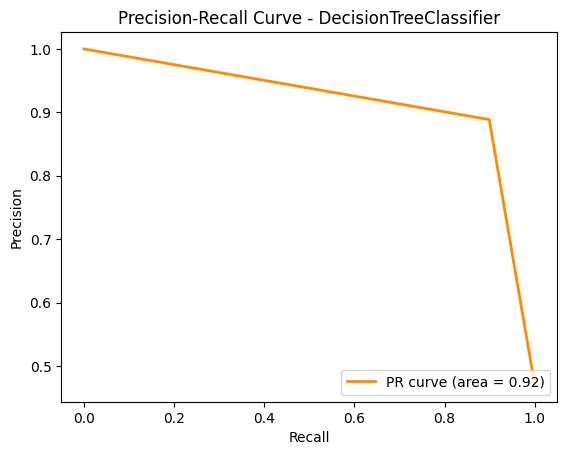

Evaluation on filtered fake news test set:
F1 Score: 0.8938053097345132
Accuracy: 0.899581589958159
Precision: 0.8885630498533724
Recall: 0.8991097922848664
AUROC: 0.8995548961424332
PR AUC: 0.8463355439276535




In [ ]:
clf=DecisionTreeClassifier()
clf_name="DecisionTreeClassifier"
cv_scores_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')  # Add F1 score

print(f"Mean AUROC: {np.mean(cv_scores_auc)}")
print(f"Mean Accuracy: {np.mean(cv_scores_accuracy)}")
print(f"Mean Precision: {np.mean(cv_scores_precision)}")
print(f"Mean Recall: {np.mean(cv_scores_recall)}")
print(f"Mean F1 Score: {np.mean(cv_scores_f1)}")  # Print mean F1 score
print("\n")

# Fit classifier on full training set and evaluate on filtered test set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_group0)

# Classification report
report = classification_report(y_test_group0, y_pred, labels=[0, 1], target_names=['Not Shared', 'Shared'])
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_test_group0, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {clf_name}')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_group0, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {clf_name}')
plt.legend(loc='lower right')
plt.show()


# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_group0, y_pred)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {clf_name}')
plt.legend(loc='lower right')
plt.show()

# F1 score
f1 = f1_score(y_test_group0, y_pred)


# Additional evaluation metrics
accuracy = accuracy_score(y_test_group0, y_pred)
precision = precision_score(y_test_group0, y_pred)
recall = recall_score(y_test_group0, y_pred)
roc_auc = roc_auc_score(y_test_group0, y_pred)
pr_auc = average_precision_score(y_test_group0, y_pred)

print(f"Evaluation on filtered fake news test set:")
print(f"F1 Score: {f1}")  # Print F1 score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUROC: {roc_auc}")
print(f"PR AUC: {pr_auc}")
print("\n")


# ** XGBClassifier**

Mean AUROC: 0.9595331605798041
Mean Accuracy: 0.8993258426966293
Mean Precision: 0.8690100832577429
Mean Recall: 0.9292452830188678
Mean F1 Score: 0.8979270632516329


Classification Report:
              precision    recall  f1-score   support

  Not Shared       0.94      0.89      0.91       380
      Shared       0.88      0.94      0.91       337

    accuracy                           0.91       717
   macro avg       0.91      0.91      0.91       717
weighted avg       0.91      0.91      0.91       717



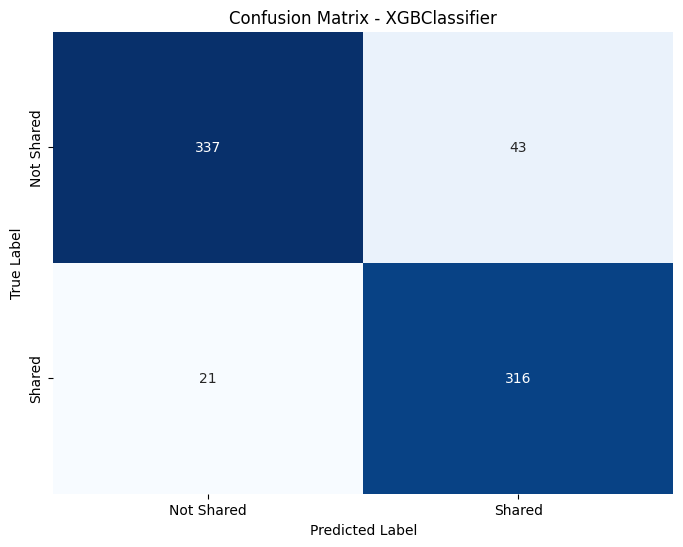

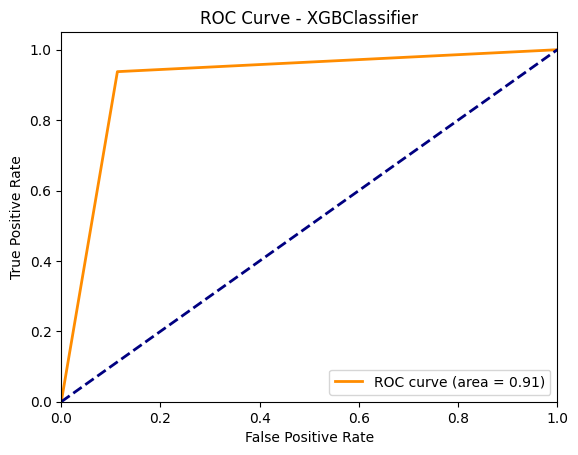

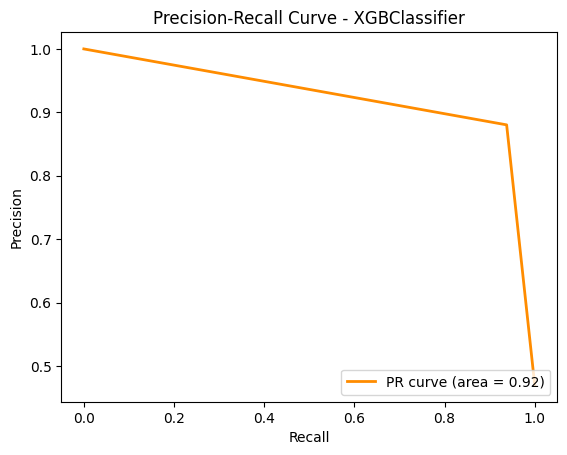

Evaluation on filtered fake news test set:
F1 Score: 0.9080459770114943
Accuracy: 0.9107391910739191
Precision: 0.8802228412256268
Recall: 0.9376854599406528
AUROC: 0.9122637826019053
PR AUC: 0.8546608626537904




In [ ]:
clf=XGBClassifier()
clf_name="XGBClassifier"
cv_scores_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')  # Add F1 score

print(f"Mean AUROC: {np.mean(cv_scores_auc)}")
print(f"Mean Accuracy: {np.mean(cv_scores_accuracy)}")
print(f"Mean Precision: {np.mean(cv_scores_precision)}")
print(f"Mean Recall: {np.mean(cv_scores_recall)}")
print(f"Mean F1 Score: {np.mean(cv_scores_f1)}")  # Print mean F1 score
print("\n")

# Fit classifier on full training set and evaluate on filtered test set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_group0)

# Classification report
report = classification_report(y_test_group0, y_pred, labels=[0, 1], target_names=['Not Shared', 'Shared'])
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_test_group0, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {clf_name}')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_group0, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {clf_name}')
plt.legend(loc='lower right')
plt.show()


# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_group0, y_pred)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {clf_name}')
plt.legend(loc='lower right')
plt.show()

# F1 score
f1 = f1_score(y_test_group0, y_pred)


# Additional evaluation metrics
accuracy = accuracy_score(y_test_group0, y_pred)
precision = precision_score(y_test_group0, y_pred)
recall = recall_score(y_test_group0, y_pred)
roc_auc = roc_auc_score(y_test_group0, y_pred)
pr_auc = average_precision_score(y_test_group0, y_pred)

print(f"Evaluation on filtered fake news test set:")
print(f"F1 Score: {f1}")  # Print F1 score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUROC: {roc_auc}")
print(f"PR AUC: {pr_auc}")
print("\n")


# **HistGradientBoostingClassifier**

Mean AUROC: 0.9613207547169811
Mean Accuracy: 0.9020224719101122
Mean Precision: 0.8716063892929602
Mean Recall: 0.9320754716981133
Mean F1 Score: 0.9007063690822233


Classification Report:
              precision    recall  f1-score   support

  Not Shared       0.94      0.90      0.92       380
      Shared       0.89      0.94      0.91       337

    accuracy                           0.92       717
   macro avg       0.92      0.92      0.92       717
weighted avg       0.92      0.92      0.92       717



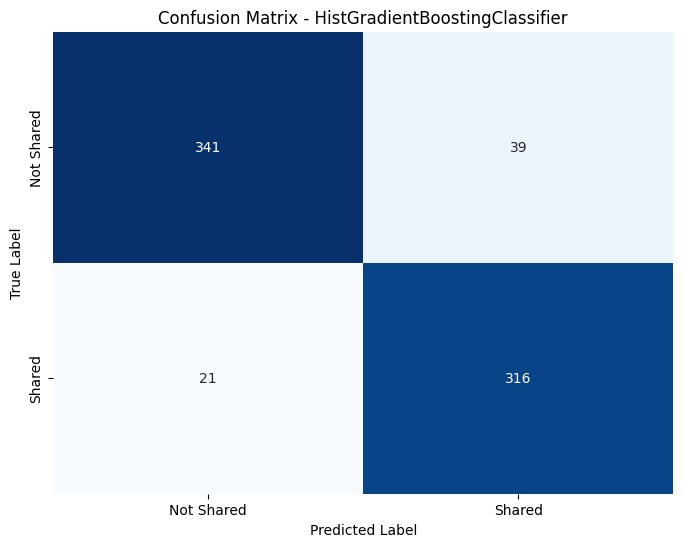

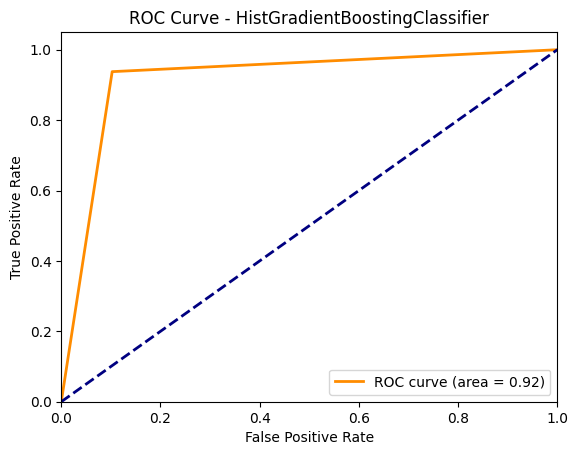

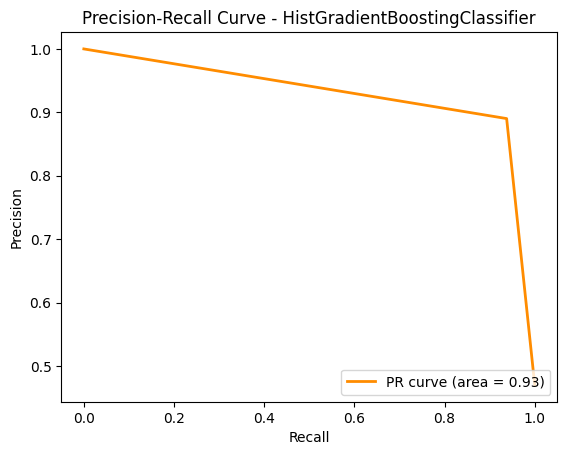

Evaluation on filtered fake news test set:
F1 Score: 0.9132947976878613
Accuracy: 0.9163179916317992
Precision: 0.8901408450704226
Recall: 0.9376854599406528
AUROC: 0.9175269404966422
PR AUC: 0.8639608306506908




In [ ]:
clf=HistGradientBoostingClassifier()
clf_name="HistGradientBoostingClassifier"
cv_scores_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')  # Add F1 score

print(f"Mean AUROC: {np.mean(cv_scores_auc)}")
print(f"Mean Accuracy: {np.mean(cv_scores_accuracy)}")
print(f"Mean Precision: {np.mean(cv_scores_precision)}")
print(f"Mean Recall: {np.mean(cv_scores_recall)}")
print(f"Mean F1 Score: {np.mean(cv_scores_f1)}")  # Print mean F1 score
print("\n")

# Fit classifier on full training set and evaluate on filtered test set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_group0)

# Classification report
report = classification_report(y_test_group0, y_pred, labels=[0, 1], target_names=['Not Shared', 'Shared'])
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_test_group0, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {clf_name}')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_group0, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {clf_name}')
plt.legend(loc='lower right')
plt.show()


# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_group0, y_pred)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {clf_name}')
plt.legend(loc='lower right')
plt.show()

# F1 score
f1 = f1_score(y_test_group0, y_pred)


# Additional evaluation metrics
accuracy = accuracy_score(y_test_group0, y_pred)
precision = precision_score(y_test_group0, y_pred)
recall = recall_score(y_test_group0, y_pred)
roc_auc = roc_auc_score(y_test_group0, y_pred)
pr_auc = average_precision_score(y_test_group0, y_pred)

print(f"Evaluation on filtered fake news test set:")
print(f"F1 Score: {f1}")  # Print F1 score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUROC: {roc_auc}")
print(f"PR AUC: {pr_auc}")
print("\n")


# **LogisticRegression**

Mean AUROC: 0.905316219936837
Mean Accuracy: 0.8692134831460674
Mean Precision: 0.8033627430004865
Mean Recall: 0.9613207547169811
Mean F1 Score: 0.875111118391412


Classification Report:
              precision    recall  f1-score   support

  Not Shared       0.97      0.81      0.88       380
      Shared       0.82      0.97      0.89       337

    accuracy                           0.89       717
   macro avg       0.90      0.89      0.89       717
weighted avg       0.90      0.89      0.89       717



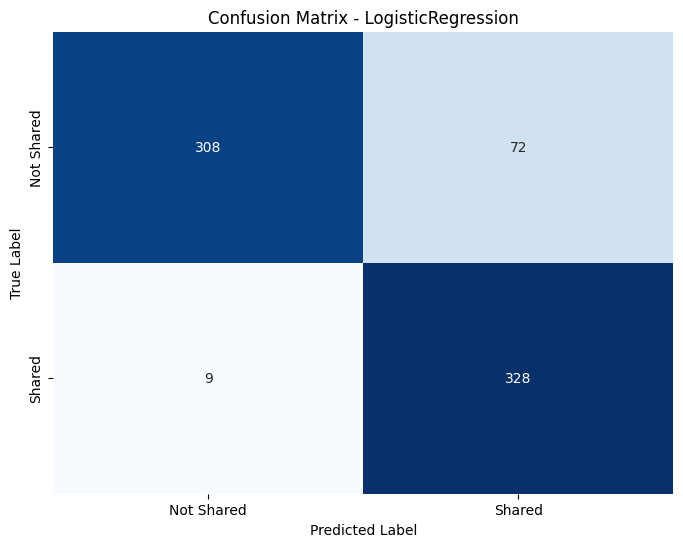

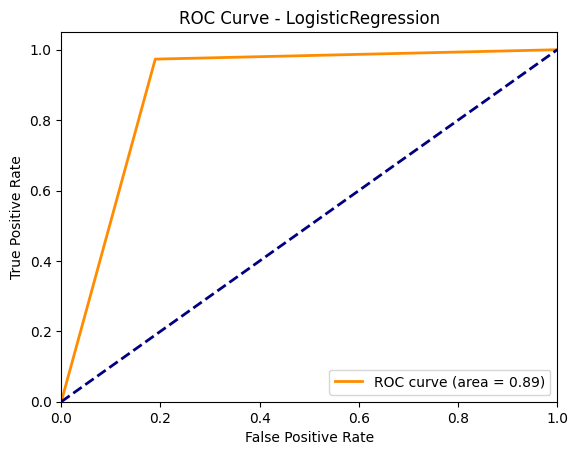

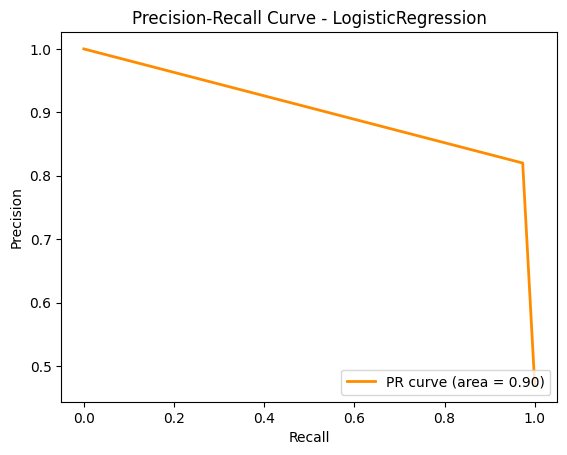

Evaluation on filtered fake news test set:
F1 Score: 0.8900949796472184
Accuracy: 0.8870292887029289
Precision: 0.82
Recall: 0.973293768545994
AUROC: 0.8919100421677337
PR AUC: 0.8106531914629451




In [ ]:
clf=LogisticRegression(max_iter=1000)
clf_name="LogisticRegression"
cv_scores_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')  # Add F1 score

print(f"Mean AUROC: {np.mean(cv_scores_auc)}")
print(f"Mean Accuracy: {np.mean(cv_scores_accuracy)}")
print(f"Mean Precision: {np.mean(cv_scores_precision)}")
print(f"Mean Recall: {np.mean(cv_scores_recall)}")
print(f"Mean F1 Score: {np.mean(cv_scores_f1)}")  # Print mean F1 score
print("\n")

# Fit classifier on full training set and evaluate on filtered test set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_group0)

# Classification report
report = classification_report(y_test_group0, y_pred, labels=[0, 1], target_names=['Not Shared', 'Shared'])
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_test_group0, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {clf_name}')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_group0, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {clf_name}')
plt.legend(loc='lower right')
plt.show()


# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_group0, y_pred)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {clf_name}')
plt.legend(loc='lower right')
plt.show()

# F1 score
f1 = f1_score(y_test_group0, y_pred)


# Additional evaluation metrics
accuracy = accuracy_score(y_test_group0, y_pred)
precision = precision_score(y_test_group0, y_pred)
recall = recall_score(y_test_group0, y_pred)
roc_auc = roc_auc_score(y_test_group0, y_pred)
pr_auc = average_precision_score(y_test_group0, y_pred)

print(f"Evaluation on filtered fake news test set:")
print(f"F1 Score: {f1}")  # Print F1 score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUROC: {roc_auc}")
print(f"PR AUC: {pr_auc}")
print("\n")


# **Support Vector Machine**

Mean AUROC: 0.8739614543687747
Mean Accuracy: 0.7743820224719101
Mean Precision: 0.6874411854230374
Mean Recall: 0.9660377358490566
Mean F1 Score: 0.8031944631633611


Classification Report:
              precision    recall  f1-score   support

  Not Shared       0.97      0.72      0.83       380
      Shared       0.76      0.98      0.85       337

    accuracy                           0.84       717
   macro avg       0.86      0.85      0.84       717
weighted avg       0.87      0.84      0.84       717



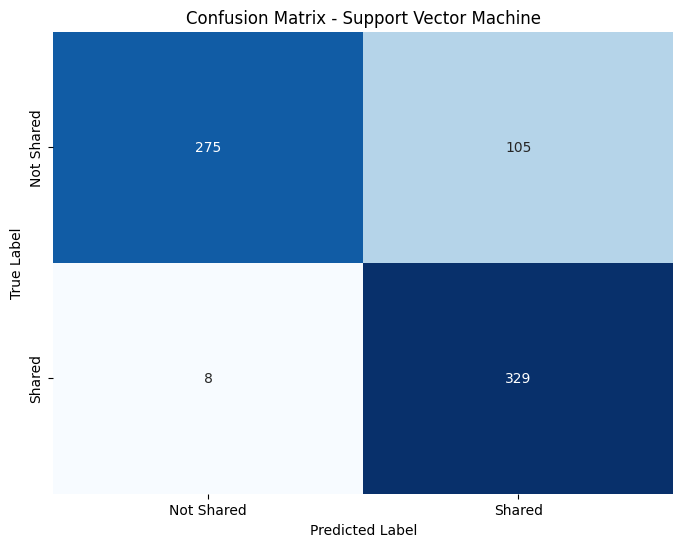

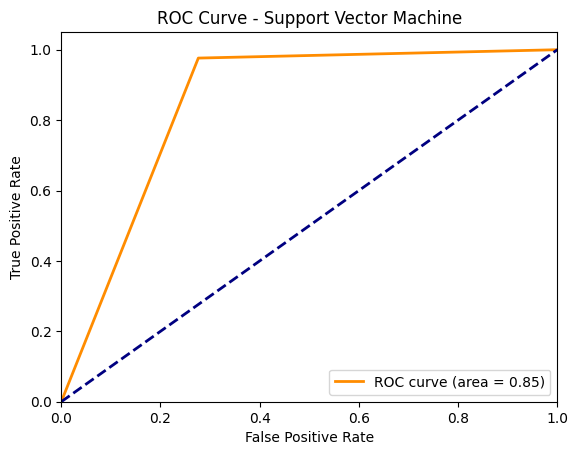

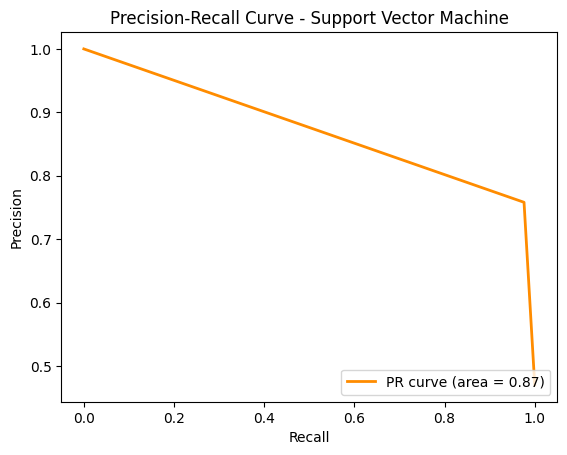

Evaluation on filtered fake news test set:
F1 Score: 0.853437094682231
Accuracy: 0.8423988842398884
Precision: 0.7580645161290323
Recall: 0.9762611275964391
AUROC: 0.8499726690613775
PR AUC: 0.7512265204227382




In [ ]:
clf=SVC()
clf_name="Support Vector Machine"
cv_scores_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')  # Add F1 score

print(f"Mean AUROC: {np.mean(cv_scores_auc)}")
print(f"Mean Accuracy: {np.mean(cv_scores_accuracy)}")
print(f"Mean Precision: {np.mean(cv_scores_precision)}")
print(f"Mean Recall: {np.mean(cv_scores_recall)}")
print(f"Mean F1 Score: {np.mean(cv_scores_f1)}")  # Print mean F1 score
print("\n")

# Fit classifier on full training set and evaluate on filtered test set
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_group0)

# Classification report
report = classification_report(y_test_group0, y_pred, labels=[0, 1], target_names=['Not Shared', 'Shared'])
print("Classification Report:")
print(report)

# Confusion matrix
cm = confusion_matrix(y_test_group0, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - {clf_name}')
plt.xticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
plt.yticks(ticks=[0.5, 1.5], labels=['Not Shared', 'Shared'])
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test_group0, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {clf_name}')
plt.legend(loc='lower right')
plt.show()


# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_group0, y_pred)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve - {clf_name}')
plt.legend(loc='lower right')
plt.show()

# F1 score
f1 = f1_score(y_test_group0, y_pred)


# Additional evaluation metrics
accuracy = accuracy_score(y_test_group0, y_pred)
precision = precision_score(y_test_group0, y_pred)
recall = recall_score(y_test_group0, y_pred)
roc_auc = roc_auc_score(y_test_group0, y_pred)
pr_auc = average_precision_score(y_test_group0, y_pred)

print(f"Evaluation on filtered fake news test set:")
print(f"F1 Score: {f1}")  # Print F1 score
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"AUROC: {roc_auc}")
print(f"PR AUC: {pr_auc}")
print("\n")
